In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

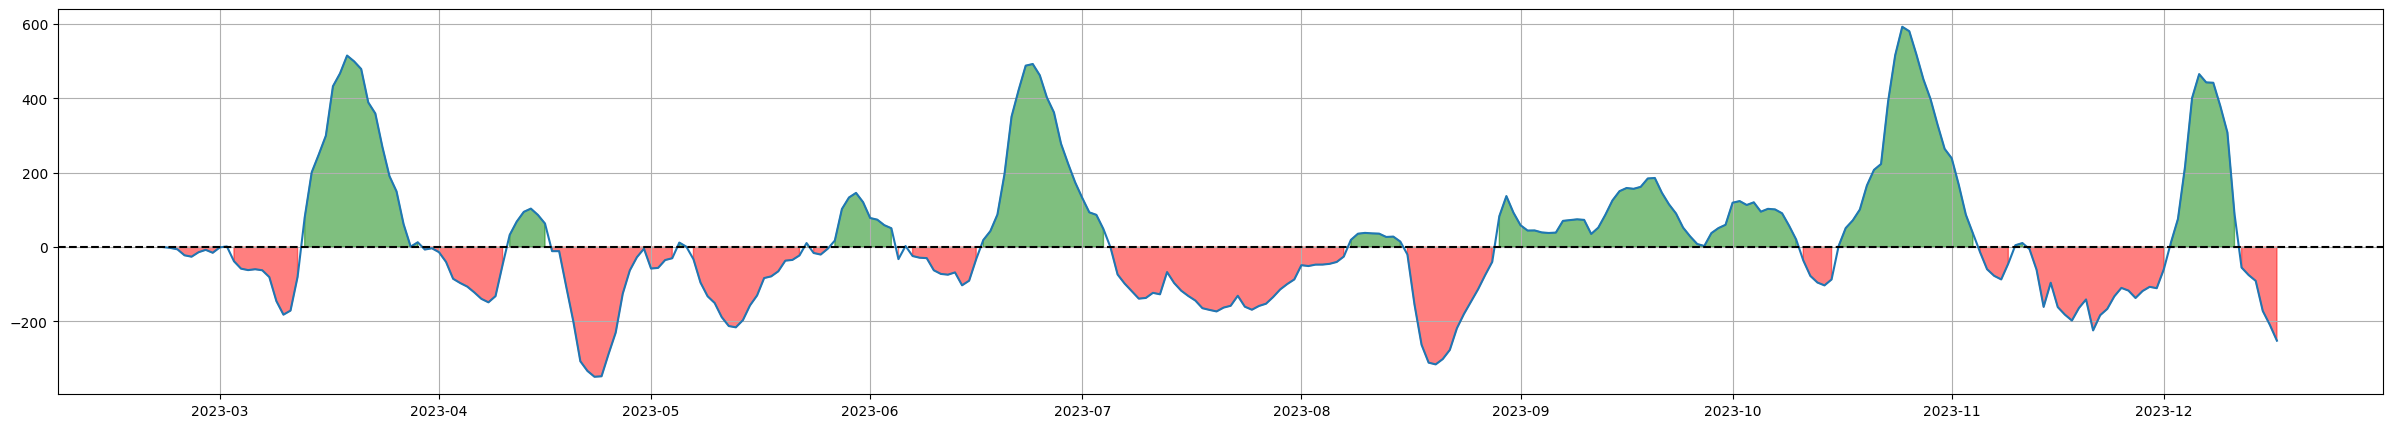

In [4]:
from algo_trader.lib.indicators.macd import MACD

df = data.iloc[-300:]
macd = MACD(23,12,9)
macd.calculate(df)
macd.plot()

C:\Users\Pablo\AppData\Local\Temp\ipykernel_22988\2038595398.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['histogram'] = macd.calculate(df)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_22988\2038595398.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['buy_signal'] = macd.calc_buy_signals()
C:\Users\Pablo\AppData\Local\Temp\ipykernel_22988\2038595398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

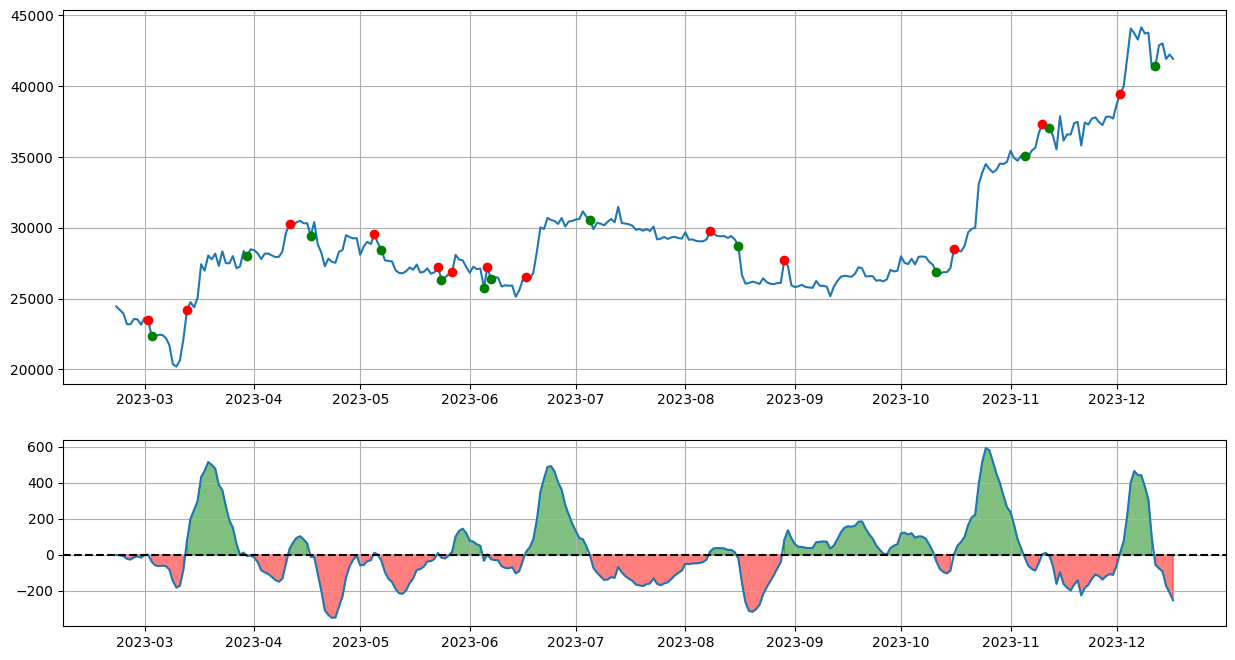

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df['histogram'] = macd.calculate(df)
df['buy_signal'] = macd.calc_buy_signals()
df['sell_signal'] = macd.calc_sell_signals()
buySignals = df[df['buy_signal'] == 1]
sellSignals = df[df['sell_signal'] == 1]

ax[0].plot(df.index, df.Close)
ax[0].plot(buySignals.index, buySignals.Close, 'o', color='red')
ax[0].plot(sellSignals.index, sellSignals.Close, 'o', color='green')
ax[0].grid()

ax[1].plot(df.index, df.histogram)
ax[1].axhline(0, linestyle='--', linewidth=1.5, color='black')
ax[1].fill_between(df.index, df.histogram, 0, where=df.histogram>0, alpha=0.5, color='green')
ax[1].fill_between(df.index, df.histogram, 0, where=df.histogram<0, alpha=0.5, color='red')
ax[1].grid()